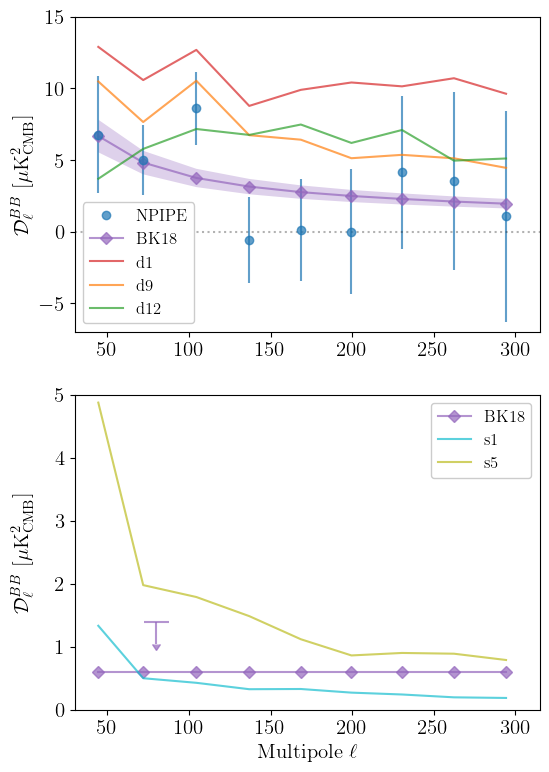

In [1]:
# 20240508:
# Plotting a BB graph of PySM models vs. BK18 best-fit
#
# Note: run it in Python3

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
import matplotlib as mpl

# Change font globally
#rc('font',**{'family':'serif', 'size': 12})
#rc('font',**{'family':'serif', 'size': 12})
mpl.rc('font',**{'family':'serif'})

# For \text command
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Show plot
plt.ion()

fig, axs = plt.subplots(2,1,figsize=(6.0,9.0))

# Science bins
scbins = np.arange(1,10)

####### First plot: Dust #######
# Load and plot NPIPE delta 353 GHz data from BK18 analysis
txtname = 'BKfield_data/BK18_NPIPE_353_delta_final.txt'
txtarray = np.loadtxt(txtname)
# Load all bins - there are only science bins anyway
wlc = txtarray[:,0]
NPIPE_dlbb = txtarray[:,1]
NPIPE_err_dlbb = txtarray[:,2]
p1, = axs[0].plot(wlc, np.full((wlc.size),np.nan), 'o', color='tab:blue', alpha=0.7)
p2 = axs[0].errorbar(wlc, NPIPE_dlbb, NPIPE_err_dlbb, fmt='o', color='tab:blue', alpha=0.7)

# BK18 best fit data
txtname = 'BKfield_data/BK18_dust_353_delta_final.txt'
# Get wlc and final Dl
txtarray = np.loadtxt(txtname)
# Load all bins
wlc = txtarray[:,0]
BK18_dlbb = txtarray[:,1]
# Plot BK18 best fit data
p3, = axs[0].plot(wlc[scbins], BK18_dlbb[scbins], 'D-', color='tab:purple',alpha=0.7)
# Plot an error range coming from BK18 Ad MCMC uncertainity ~+/- 0.75 uK^2
txtname = 'BKfield_data/BK18_dust_353_ul_delta_final.txt'
txtarray = np.loadtxt(txtname)
BK18_dlbb_ul = txtarray[:,1]
txtname = 'BKfield_data/BK18_dust_353_ll_delta_final.txt'
txtarray = np.loadtxt(txtname)
BK18_dlbb_ll = txtarray[:,1]
p4 = axs[0].fill_between(wlc[scbins], BK18_dlbb_ll[scbins], BK18_dlbb_ul[scbins], alpha=0.3, facecolor='tab:purple')

# Load and plot d1 model
txtname = 'BKfield_data/BK_pysm_d1_353_delta_reobs_final.txt'
txtarray = np.loadtxt(txtname)
# Load all bins
d1_dlbb = txtarray[:,1]
p5, = axs[0].plot(wlc[scbins], d1_dlbb[scbins], color='tab:red',alpha=0.7)

# Load and plot d9 model
txtname = 'BKfield_data/BK_pysm_d9_353_delta_reobs_final.txt'
txtarray = np.loadtxt(txtname)
# Load all bins
d9_dlbb = txtarray[:,1]
p6, = axs[0].plot(wlc[scbins], d9_dlbb[scbins], color='tab:orange',alpha=0.7)

# Load and plot d12 model
txtname = 'BKfield_data/BK_pysm_d12_353_delta_reobs_final.txt'
txtarray = np.loadtxt(txtname)
# Load all bins
d12_dlbb = txtarray[:,1]
p7, = axs[0].plot(wlc[scbins], d12_dlbb[scbins], color='tab:green',alpha=0.7)

# Add a zero horizontal line
axs[0].axhline(0, linestyle=':', color='k', alpha=0.3)

####### Second plot: Synchrotron #######
# BK18 best fit data
txtname = 'BKfield_data/BK18_sync_023_delta_final.txt'
# Get wlc and final Dl
txtarray = np.loadtxt(txtname)
# Load all bins
wlc = txtarray[:,0]
BK18_dlbb = txtarray[:,1]
# Plot BK18 best fit data
p8, = axs[1].plot(wlc[scbins], BK18_dlbb[scbins], 'D-', color='tab:purple',alpha=0.7)
# Plot an error range coming from BK18 As MCMC 95% upper limit
#txtname = 'BKfield_data/BK18_sync_023_ul_delta_final.txt'
#txtarray = np.loadtxt(txtname)
#BK18_dlbb_ul = txtarray[1:,1]
#p12 = axs[1].fill_between(wlc, 0, BK18_dlbb_ul, alpha=0.3, facecolor='tab:purple')
# Plot an upper limit symbol standing for A_s@ell=80 < 1.4 uK^2 (95% CL) from BK18 MCMC
axs[1].errorbar(80,1.4,xerr=7.5,yerr=0.35,uplims=True,color='tab:purple',alpha=0.7)

# Load and plot s1 model
txtname = 'BKfield_data/BK_pysm_s1_023_delta_reobs_final.txt'
txtarray = np.loadtxt(txtname)
# Load all bins
s1_dlbb = txtarray[:,1]
p9, = axs[1].plot(wlc[scbins], s1_dlbb[scbins], color='tab:cyan',alpha=0.7)

# Load and plot s5 model
txtname = 'BKfield_data/BK_pysm_s5_023_delta_reobs_final.txt'
txtarray = np.loadtxt(txtname)
# Load all bins
s5_dlbb = txtarray[:,1]
p10, = axs[1].plot(wlc[scbins], s5_dlbb[scbins], color='tab:olive',alpha=0.7)

# Plotting format
axs[0].set_xlim((30, 315))
axs[1].set_xlim((30, 315))

axs[0].set_ylim((-7, 15))
axs[1].set_ylim((0, 5))

axs[0].xaxis.set_tick_params(direction="out",which="both",labelsize=15)
axs[0].yaxis.set_tick_params(direction="out",which="both",labelsize=15)
axs[1].xaxis.set_tick_params(direction="out",which="both",labelsize=15)
axs[1].yaxis.set_tick_params(direction="out",which="both",labelsize=15)

axs[0].set_ylabel('$\mathcal{D}_\ell^{BB}$ [$\mu \mathrm{K^2_{CMB}}$]',fontsize=15)
axs[1].set_ylabel('$\mathcal{D}_\ell^{BB}$ [$\mu \mathrm{K^2_{CMB}}$]',fontsize=15)
fig.align_ylabels()
axs[1].set_xlabel('Multipole $\ell$',fontsize=15)

axs[0].legend([p1,p3,p5,p6,p7],['NPIPE','BK18','d1','d9','d12'],fontsize=12,framealpha=1)
axs[1].legend([p8,p9,p10],['BK18','s1','s5'],fontsize=12,framealpha=1)

plt.savefig('BKfield_power.pdf',bbox_inches='tight')